In [1]:
import scraping_class
import time
import re
from bs4 import BeautifulSoup
import pandas as pd
import csv
import json
import pyprind
import urllib.parse

In [2]:
import pandas as pd
df = pd.read_csv('KUstatsMerged.csv')
# Convert the DataFrame to a dictionary
df_statistik = df

Extractiong number from string

In [3]:
# Convert 'GPA' and 'numPassed' columns to string type
df_statistik['GPA'] = df_statistik['GPA'].astype(str)
df_statistik['numPassed'] = df_statistik['numPassed'].astype(str)

# Perform the requested operations
df_statistik['GPA'] = df_statistik['GPA'].replace('Intet eksamensgennemsnit', None)
df_statistik['GPA'] = df_statistik['GPA'].str.replace(',', '.', regex=True).str.split().str[0]
df_statistik['numPassed'] = df_statistik['numPassed'].str.split().str[0]


Converting to numeric variables

In [4]:
# As 'credit' is already of numeric type, we don't need to replace ',' with '.' and convert it to numeric
# We will convert the rest of the columns to numeric type

df_statistik['numSignedUp'] = pd.to_numeric(df_statistik['numSignedUp'], errors='coerce')
df_statistik['numAttended'] = pd.to_numeric(df_statistik['numAttended'], errors='coerce')
df_statistik['numPassed'] = pd.to_numeric(df_statistik['numPassed'], errors='coerce')
df_statistik['GPA'] = pd.to_numeric(df_statistik['GPA'], errors='coerce')

# Converting grading scale columns to numeric
df_statistik['12(B)'] = pd.to_numeric(df_statistik['12(B)'], errors='coerce')
df_statistik['10(I)'] = pd.to_numeric(df_statistik['10(I)'], errors='coerce')
df_statistik['7(U)'] = pd.to_numeric(df_statistik['7(U)'], errors='coerce')
df_statistik['4'] = pd.to_numeric(df_statistik['4'], errors='coerce')
df_statistik['02'] = pd.to_numeric(df_statistik['02'], errors='coerce')
df_statistik['00'] = pd.to_numeric(df_statistik['00'], errors='coerce')
df_statistik['-3'] = pd.to_numeric(df_statistik['-3'], errors='coerce')
df_statistik['Absent'] = pd.to_numeric(df_statistik['Absent'], errors='coerce')

df_statistik.dtypes

Unnamed: 0                                                                    int64
courseID                                                                     object
courseName                                                                   object
faculty                                                                      object
department                                                                   object
term                                                                         object
credit                                                                      float64
type                                                                         object
numSignedUp                                                                   int64
numAttended                                                                   int64
numPassed                                                                   float64
GPA                                                                         

In [5]:
df_statistik=df_statistik[df_statistik['numAttended']>3] #exams with less than 3 perticipants aren't showing statistics
df_statistik=df_statistik.reset_index(drop=True)

In [35]:
df_statistik

,Unnamed: 0,courseID,courseName,faculty,department,term,credit,type,numSignedUp,numAttended,...,Lectures,Preparation,Excursions,Guidance,Exercises,E-Learning,Project work,Field Work,Exam Preparation,Total
0,0,TTEASK031,The Philosophy of Religion After the Death of God,Det Teologiske Fakultet,NaN,s20,15.0,ordinaryExam,24,20,...,0.0,122.0,0.0,0.0,28.0,0.0,0.0,0.0,270.0,420.0
1,1,TTEASK031,The Philosophy of Religion After the Death of God,Det Teologiske Fakultet,NaN,v19,15.0,ordinaryExam,24,21,...,0.0,122.0,0.0,0.0,28.0,0.0,0.0,0.0,270.0,420.0
2,2,TTEASK031,The Philosophy of Religion After the Death of God,Det Teologiske Fakultet,NaN,s19,15.0,ordinaryExam,23,19,...,0.0,122.0,0.0,0.0,28.0,0.0,0.0,0.0,270.0,420.0
3,3,TTEASK031,The Philosophy of Religion After the Death of God,Det Teologiske Fakultet,NaN,v18,15.0,ordinaryExam,15,14,...,0.0,122.0,0.0,0.0,28.0,0.0,0.0,0.0,270.0,420.0
4,4,TTEASK030,Kierkegaards Authorship: On the Loss and Recov...,Det Teologiske Fakultet,NaN,s20,15.0,ordinaryExam,14,13,...,0.0,122.0,0.0,0.0,28.0,0.0,0.0,0.0,270.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17661,17661,AANA17101,Critical Data Studies,Det Samfundsvidenskabelige Fakultet,Institut for antropologi,s18,7.5,ordinaryExam,43,35,...,0.0,80.0,0.0,0.0,42.0,0.0,0.0,0.0,85.0,207.0
17662,17662,AANA17101,Critical Data Studies,Det Samfundsvidenskabelige Fakultet,Institut for antropologi,s18,7.5,reExam,8,5,...,0.0,80.0,0.0,0.0,42.0,0.0,0.0,0.0,85.0,207.0
17663,17663,AANA17100,"Markets, Power and Global Cities",Det Samfundsvidenskabelige Fakultet,Institut for antropologi,s18,7.5,ordinaryExam,32,28,...,42.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,207.0
17664,17664,AANA17100,"Markets, Power and Global Cities",Det Samfundsvidenskabelige Fakultet,Institut for antropologi,v17,7.5,ordinaryExam,39,34,...,42.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,207.0


# Plots for assignment

In [6]:
df_merged=df_statistik

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

WAC = lambda x: np.average(x.fillna(0), weights=df_merged.loc[x.index,'numAttended'])

df_7grading = df_merged[df_merged['markingScale']=='7-point grading scale']
df_passed = df_merged[df_merged['markingScale']=='passed/not passed']

### 4.1 Plot of weighted GPA vs. non-weighted GPA

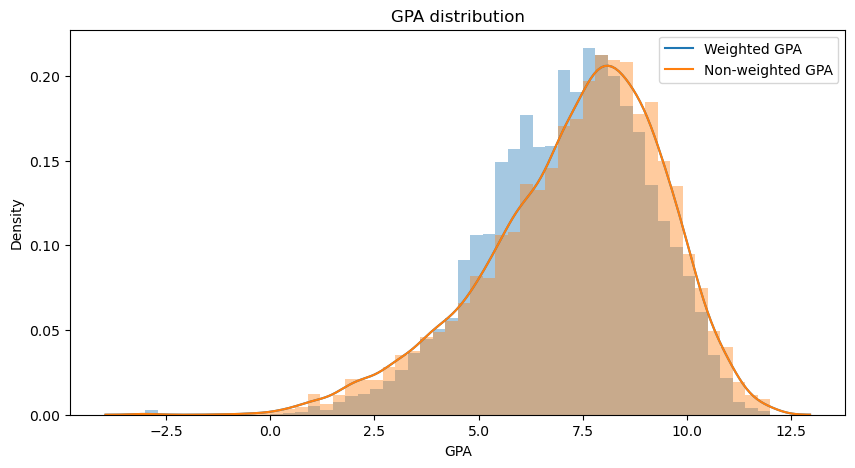

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
counts = df_7grading['numAttended'].values
sns.distplot(df_7grading['GPA'].values ,hist_kws={'weights':counts}, ax=ax)
sns.distplot(df_merged.GPA,ax=ax)
plt.legend(['Weighted GPA', 'Non-weighted GPA'])
ax.set_title("GPA distribution")
plt.show()

<Axes: xlabel='numAttended', ylabel='GPA'>

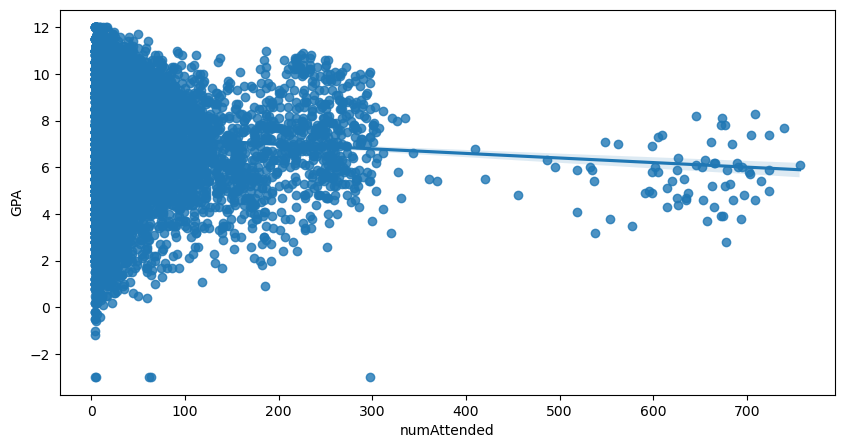

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(y='GPA', x='numAttended', data=df_7grading)

### 4.2 Plot of ordinary exam vs. reexam

In [10]:
df_7grading.groupby(['type']).agg(GPA_WAC=('GPA',WAC), GPA_average=('GPA','mean'))

,GPA_WAC,GPA_average
type,,
ordinaryExam,7.250029,7.782538
reExam,4.886623,5.602764


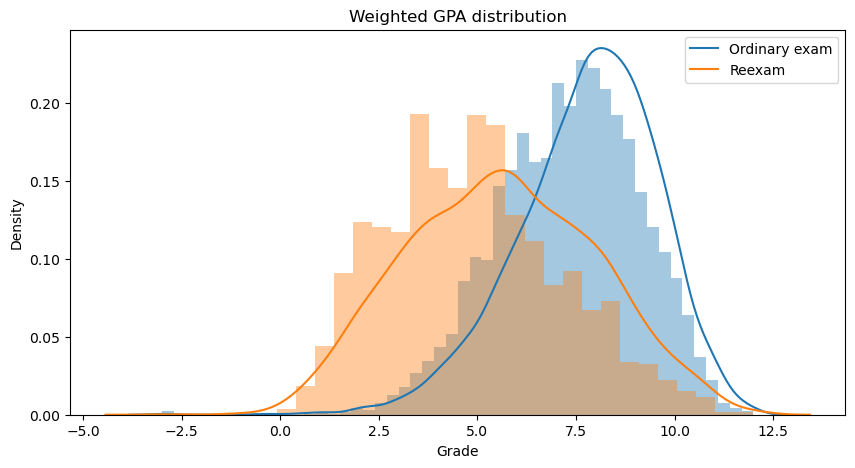

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

for etype in ['ordinaryExam','reExam']:
    counts = df_7grading['numAttended'][(df_7grading['type']==etype)].values
    x = df_7grading['GPA'][(df_7grading['type']==etype)].values
    sns.distplot(x ,hist_kws={'weights':counts}, ax=ax)

plt.legend(['Ordinary exam', 'Reexam'])
ax.set(xlabel='Grade', ylabel='Density')
ax.set_title("Weighted GPA distribution")
plt.show()

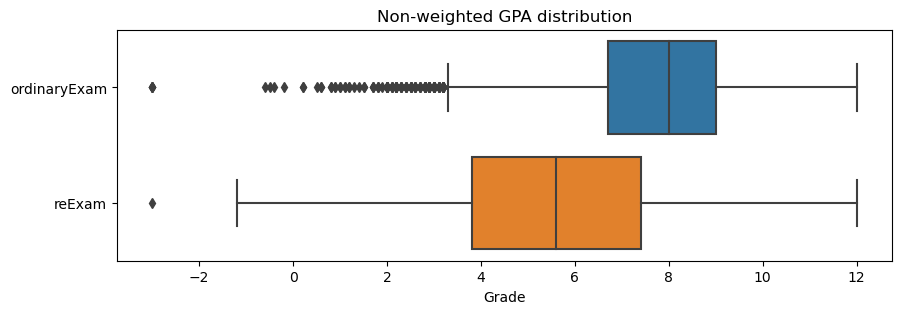

In [17]:
f,ax = plt.subplots(figsize=(10,3))
sns.boxplot(x='GPA',y='type', data=df_7grading, ax=ax)
ax.set(xlabel='Grade', ylabel='')
ax.set_title("Non-weighted GPA distribution")
plt.show()

### 4.3 Development in GPA over time

<Axes: xlabel='term', ylabel='GPA_WAC'>

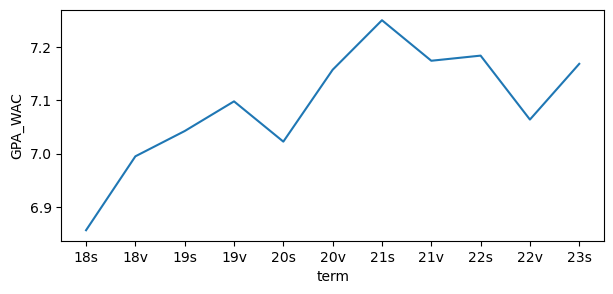

In [18]:
# Define the WAC function again in this environment
WAC = lambda x: np.average(x.fillna(0), weights=df.loc[x.index, 'numAttended'])

# Copy the DataFrame and create the 'term' column
GPA_time=df_7grading.copy()
GPA_time['term'] = df_7grading['term'].str[1:3] + df_7grading['term'].str[0]
p1 = GPA_time.groupby(['term']).agg(GPA_WAC=('GPA', WAC)).reset_index()
f, ax = plt.subplots(1, 1, figsize=(7, 3))
sns.lineplot(x='term', y='GPA_WAC', data=p1, ax=ax)

### 4.4 GPA within different faculties

In [19]:
df_7grading.groupby(['faculty']).agg(GPA_WAC=('GPA',WAC), GPA_average=('GPA','mean'))

,GPA_WAC,GPA_average
faculty,,
Det Humanistiske Fakultet,7.670607,7.418295
Det Juridiske Fakultet,6.380859,7.296382
Det Natur- og Biovidenskabelige Fakultet,7.159282,7.336965
Det Samfundsvidenskabelige Fakultet,7.451475,7.412260
Det Sundhedsvidenskabelige Fakultet,6.936787,6.999386
Det Teologiske Fakultet,6.962972,6.759777


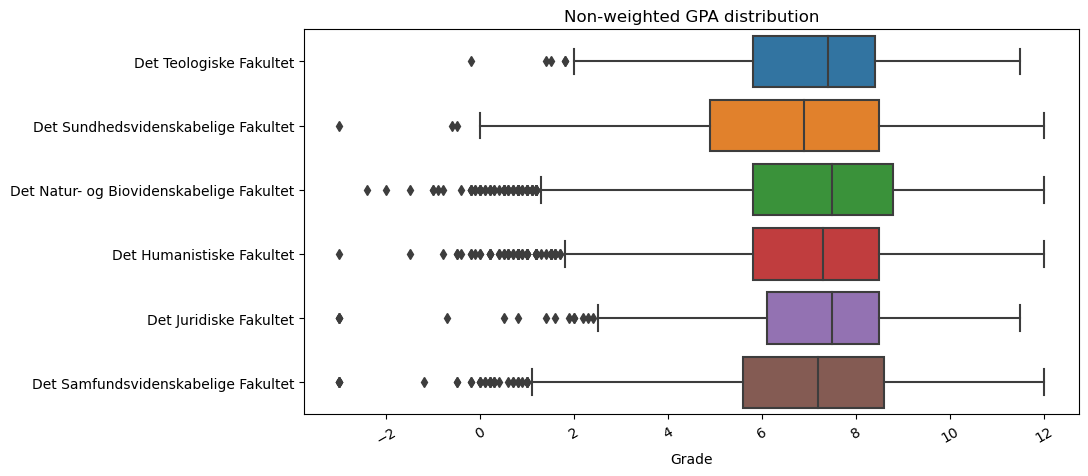

In [80]:
f,ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(y='faculty', x='GPA', data=df_7grading, ax=ax)
plt.xticks(rotation=30)
ax.set_title("Non-weighted GPA distribution")
ax.set(xlabel='Grade', ylabel='')
plt.savefig('3.4.png')
plt.show()

### 4.5 Plotting passed/not passed

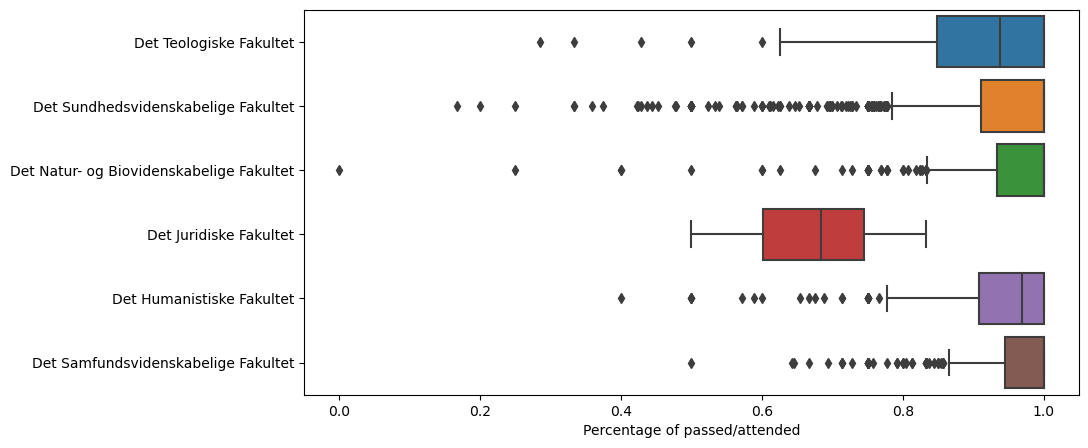

faculty
Det Humanistiske Fakultet                   115
Det Juridiske Fakultet                        2
Det Natur- og Biovidenskabelige Fakultet    101
Det Samfundsvidenskabelige Fakultet         110
Det Sundhedsvidenskabelige Fakultet         221
Det Teologiske Fakultet                      34
Name: courseID, dtype: int64

In [20]:
# Create a plot
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=df_passed['numPassed'].values / df_passed['numAttended'].values, 
            y=df_passed['faculty'].values, 
            ax=ax)
ax.set(xlabel='Percentage of passed/attended', ylabel='')
plt.show()

df_passed.groupby(['faculty'])['courseID'].nunique()

# Show the plot
plt.show()

# Print the unique courseID per faculty
df_passed.groupby(['faculty'])['courseID'].nunique()

### 4.6 Course hours against GPA

<Axes: xlabel='Total', ylabel='GPA'>

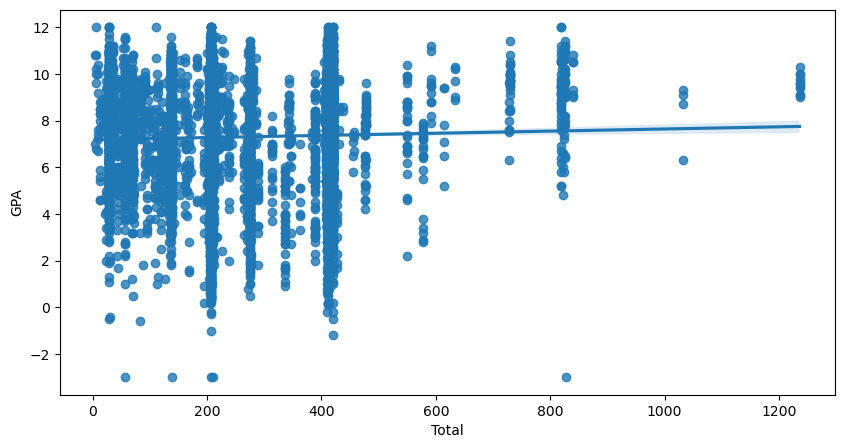

In [21]:
f,ax = plt.subplots(1,1, figsize=(10,5))
sns.regplot(x="Total", y="GPA", data=df_7grading)

### 4.7 GPA on Study Boards

In [22]:
#Hard coding study board column:
study_board_dict = {'Studienævnet for Teologi':'Study board of Theology', 'The Study Board for Veterinary Medicine and Animal\r\nScience':'Study Board of Veterinary Sciences',
                   'Veterinærstudienævnet':'Study Board of Veterinary Sciences', 'Studienævnet for Veterinærmedicin og Husdyrvidenskab':'Study Board of Veterinary Sciences',
                   'Study Board for the Master’s Degree in Health Science':'The Study Board for Medicine and Health Science','Studienævnet for Medicin og den Sundhedsfaglige\r\nKandidatuddannelse':'The Study Board for Medicine and Health Science',
                   'Studienævn for den Sundhedsfaglige Kandidatuddannelse':'The Study Board for Medicine and Health Science','Studienævn for den Sundhedsfaglige supplerings- og\r\nkandidatuddannelse':'The Study Board for Medicine and Health Science',
                   'Study Board for the Professionel Master´s Degree Programmes at\r\nThe Faculty og Health and Medical Science': 'The Study Board for Medicine and Health Science',
                   'Studienævnet for Masteruddannelserne ved Det\r\nSundhedsvidenskabelige Fakultet': np.nan, 
                   'Studienævn fra DTU':'Study board for DTU Elektro','Studienævn for DTU Elektro':'Study board for DTU Elektro','DTU Elektro':'Study board for DTU Elektro',
                   'Studienævn for det Biologiske Område': 'Study Board for the Biological Area',
                   'Study board of Medicine':'The Study Board for Medicine and Health Science','Studienævnet for Medicin':'The Study Board for Medicine and Health Science',
                   'Studienævn for Sundhed og informatik': 'Study Board of Health Informatics', 'Studienævn for Biologi og Husdyrvidenskab':'Study Board of Biology and Animal Science',
                   'Studienævn for Psykologi':'Department of Psychology, Study Council','Studienævnet for Psykologi':'Department of Psychology, Study Council',
                   'Antropologi studienævn':'Department of Anthropology, Study Council','Studienævn for Fysik, Kemi og Nanoscience':'Study Board of Physics, Chemistry and Nanoscience',
                   'Studienævnet for Informationsstudier (INF).':'Department of information stuidies','Studienævnet for Informationsstudier (INF)':'Department of information stuidies',
                   'Royal School of Library and Information Science':'Department of information stuidies','Det Informationsvidenskabelige Akademi':'Department of information stuidies',
                   'Study Board of Natural Resources, Environment and Animal\r\nScience': 'Studienævn for Naturressourcer, Miljø og Husdyr',
                   'Studienævn for Fødevarer, Human ernæring og Idræt': 'Study Board of Food, Human Nutrition and Sports',
                   'Professional Bachelor SCIENCE':'Study Board for Professional Bachelor SCIENCE','Professionsbachelorstudienævn SCIENCE':'Study Board for Professional Bachelor SCIENCE',
                   'SCIENCE Professionsbachelor':'Study Board for Professional Bachelor SCIENCE',
                   'Studienævn for Matematik og Datalogi':'Study Board of Mathematics and Computer Science',
                   'Jura': 'Law', 'Studienævnet for Tværkulturelle og Regionale Studier': 'Study Board of Cross-Cultural and Regional Studies',
                   'Studienævnet for Kunst- og Kulturvidenskab':'Study board of Arts and Cultural Studies', 'Studienævn for Biomolekylær videnskab og Teknologi': 'Study Board of Biomolecular Sciences and Technology',
                   'Studienævnet for Folkesundhedsvidenskab og Global\r\nSundhed':'Studienævn for Folkesundhedsvidenskab','The Study Board for Public Health Science and Global\r\nHealth':'Studienævn for Folkesundhedsvidenskab',
                   'Studienævn for Geovidenskaber og Planlægning': 'Study Board of Geosciences and Management', 'Studienævnet for Medier, Erkendelse og Formidling': 'Study Board of Media, Cognition and Communication',
                   'The Study Board for Human Biology and Immunology': 'Study board of Human Biology','Studienævn for de Farmaceutiske Videnskaber':'Study Board of Pharmaceutical Sciences',
                   'Statskundskab studienævn':'Department of Political Science, Study Council',
                   'Studienævn for Naturressourcer og Miljø':'Study Board of Natural Resources and Environment',
                   'Study board from DTU': 'Study board for DTU Elektro', 'Studienævnet for Engelsk, Germansk og Romansk': 'Study board of English, Germanic and Romance Studies',
                   'Study Board for the Professional Master’s Degree Programmes at\r\nThe Faculty of Health and Medical Sciences':'The Study Board for Medicine and Health Science',
                   'Study Board for the Professionel Master´s Degree Programmes at\nThe Faculty og Health and Medical Science': 'The Study Board for Medicine and Health Science',
                   'Study Board of Natural Resources and Environment':'Studienævn for Naturressourcer, Miljø og Husdyr','Studienævn for Folkesundhedsvidenskab':'Study Board for International Health',
                   'Sociologisk studienævn':'Department of Sociology, Study Council', 'Økonomisk Studienævn': 'Department of Economics, Study Council',
                   'Studienævnet for Nordiske Studier og Sprogvidenskab': 'Study Board of Scandinavian Studies and Linguistics','The Staff-Student Committee of the Bachelor/Master of Science\r\nin Public Health':'Study Board for International Health', 
                   }
df_studyBoard = df_7grading.replace({'Study board': study_board_dict})


df_studyBoard = df_studyBoard.groupby(['Study board']).agg(GPA_WAC=('GPA',WAC), GPA_average=('GPA','mean')).reset_index()
df_studyBoard = df_studyBoard.drop(df_studyBoard.index[0])

Plot:

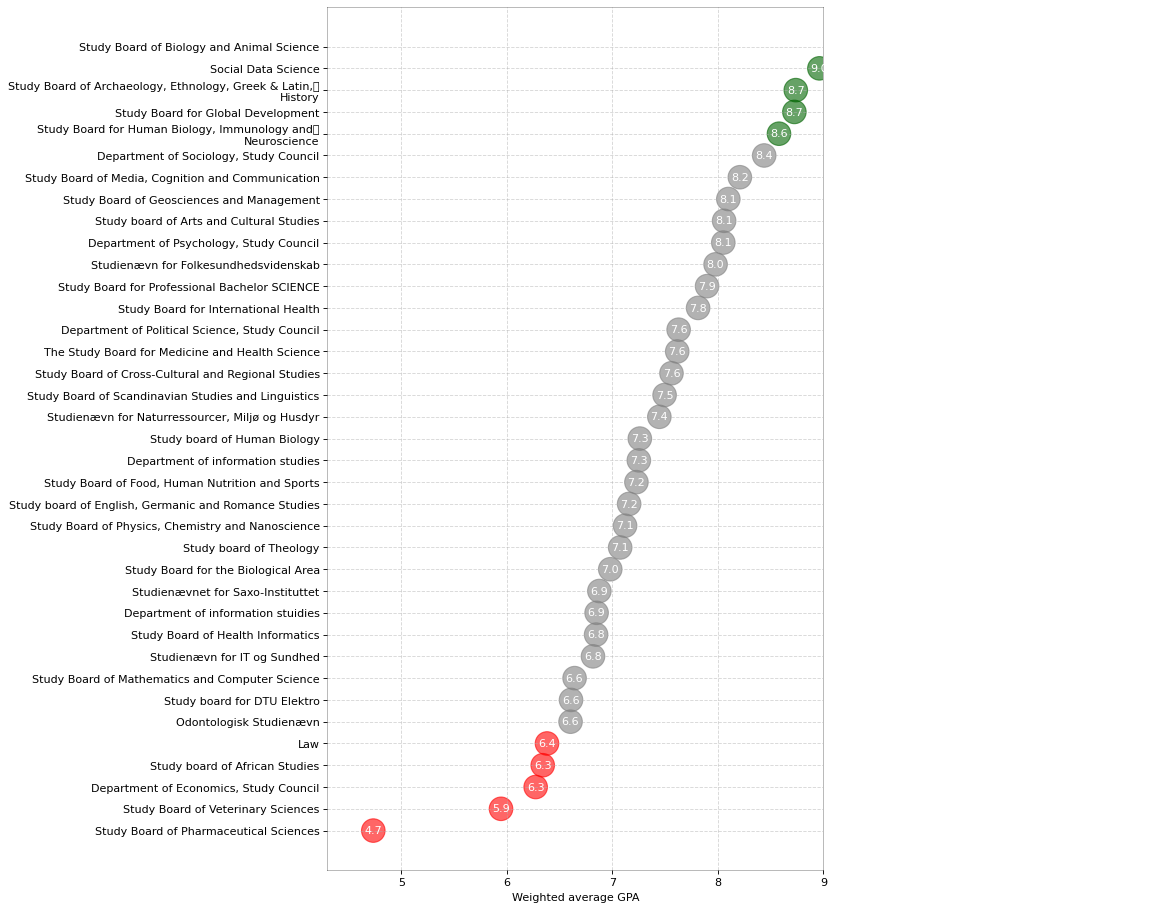

In [23]:
# Prepare Data
df_studyBoard = df_studyBoard.sort_values('GPA_WAC')
x = df_studyBoard.loc[:, ['GPA_WAC']]
maks = min(df_studyBoard['GPA_WAC'].tail(5))
mini = max(df_studyBoard['GPA_WAC'].head(5))
df_studyBoard['colors'] = ['red' if x <= mini else 'darkgreen' if x >= maks else 'grey' for x in df_studyBoard['GPA_WAC']]
df_studyBoard = df_studyBoard.sort_values('GPA_WAC')
df_studyBoard.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(8,14), dpi= 80)
plt.scatter(df_studyBoard.GPA_WAC, df_studyBoard.index, s=450, alpha=.6, color=df_studyBoard.colors)
for x, y, tex in zip(df_studyBoard.GPA_WAC, df_studyBoard.index, df_studyBoard.GPA_WAC):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df_studyBoard.index, df_studyBoard['Study board'])
plt.xlabel('Weighted average GPA')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(4.3, 9)
plt.savefig('studyBoard.png',bbox_inches = 'tight')
plt.show()

### 4.8 GPA and Type of Exam

In [24]:
df_7grading.groupby(['Type of assessment']).agg(GPA_WAC=('GPA',WAC))

,GPA_WAC
Type of assessment,
Portfolio,8.226577
continuous assessment,6.264359
course participation,8.338410
oral examination,7.997404
other,7.349733
written examination,6.556516
written product and oral examination,8.141686


### 4.9 GPA and Course Level

In [25]:
df_7grading.groupby(['Level']).agg(GPA_WAC=('GPA',WAC))

,GPA_WAC
Level,
Bachelor,6.593308
Master,7.874408
Propaedeutics,7.797531
ph.D.,7.111604


### 4.10 Type of exam (Percentage of level)

In [26]:
c = df_7grading.groupby(['Level', 'Type of assessment'])['numAttended'].sum().rename("count")
c / c.groupby(level=0).sum()

Level          Type of assessment                  
Bachelor       Portfolio                               0.014999
               continuous assessment                   0.027071
               course participation                    0.026190
               oral examination                        0.142861
               other                                   0.061083
               written examination                     0.678758
               written product and oral examination    0.049037
Master         Portfolio                               0.033385
               continuous assessment                   0.018946
               course participation                    0.105549
               oral examination                        0.207933
               other                                   0.027348
               written examination                     0.488261
               written product and oral examination    0.118579
Propaedeutics  other                                

### 4.11 GPA of course coordinators

In [30]:
def splitCoordinator(df_big):
    df_Coordinator_split = pd.DataFrame()
    error = []

    for row in df_big.itertuples():
        try:
            df_big['Coordinators'][row.Index]
            #List of coordinators:
            res = df_big['Coordinators'][row.Index].strip('][').split(', ') #List of coordinators is being converted from a string to a list.
            for i in range(len(res)): #loops through all elements in list of coordinators
                if(len(res[i].split()) > 2): #Checks if it is a name which appears in the list of coordinators
                    name = res[i].replace("'", "").strip() #extract only coordinator names.
                    df_Coordinator_split = df_Coordinator_split.append(df_big.iloc[row.Index])
                    df_Coordinator_split.iloc[-1, 9] = name #Change the coordinator column to contain one coordinator only
        except: 
            error.append(row.Index)
    try: 
        column_order = ['Extracted course name','Course content','Learning outcome', 'Coordinators', 'Type of assessment', 'Course code', 'Marking scale','Language','Level', 'Study board', 'Censorship form', 'Tutoring', 'Lectures', 'Preparation', 'Excursions', 'Guidance','Exercises', 'E-Learning', 'Project work','Field Work', 'Exam Preparation', 'Total']
        df_Coordinator_split = df_Coordinator_split[column_order]
    except: KeyError
    df_Coordinator_split.to_csv('course_data_coordinatorSplit.csv') 

Load dataset splitted on coordinators:

In [32]:
merged_data = pd.read_csv('KUstatsMerged.csv')
splitCoordinator(merged_data)

Merge dataset with grade data:

In [31]:
# Convert 'numAttended' to numeric and fill missing values in 'GPA' with 0
df_Coordinator_merged['numAttended'] = pd.to_numeric(df_Coordinator_merged['numAttended'], errors='coerce')
df_Coordinator_merged['GPA'] = df_Coordinator_merged['GPA'].fillna(0)

# Re-calculate GPA and number of students per coordinator
coordinator_GPA = df_Coordinator_merged.groupby(['Coordinators']).agg(
    GPA_WAC=('GPA', WAC_coordinator), 
    GPA_average=('GPA', 'mean'), 
    students=('numAttended', 'sum')).reset_index()

# Print results
num_coordinators = len(coordinator_GPA['Coordinators'].unique())
david_lassen = coordinator_GPA[coordinator_GPA['Coordinators'] == 'David Dreyer Lassen']
andreas_bjerre = coordinator_GPA[coordinator_GPA['Coordinators'] == 'Andreas Bjerre-Nielsen']

num_coordinators, david_lassen, andreas_bjerre

NameError: name 'df_Coordinator_merged' is not defined

### 4.12 two sample t-test

In [33]:
import scipy.stats as stats
sample1 = list(df_7grading[df_7grading['Level'] == 'Master']['GPA'])
sample2 = list(df_7grading[df_7grading['Level'] == 'Bachelor']['GPA'])
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
p_val

6.993835016198831e-203

# Plotting the data

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: xlabel='type', ylabel='GPA'>

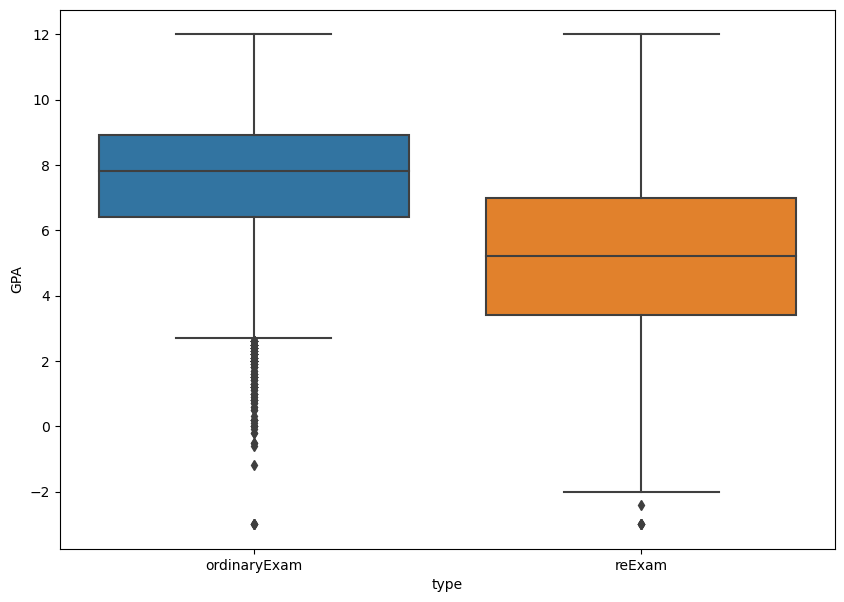

In [37]:
f,ax = plt.subplots(1,1, figsize=(10,7))
sns.boxplot(x='type', y='GPA', data=df_statistik, ax=ax)

<Axes: xlabel='GPA', ylabel='faculty'>

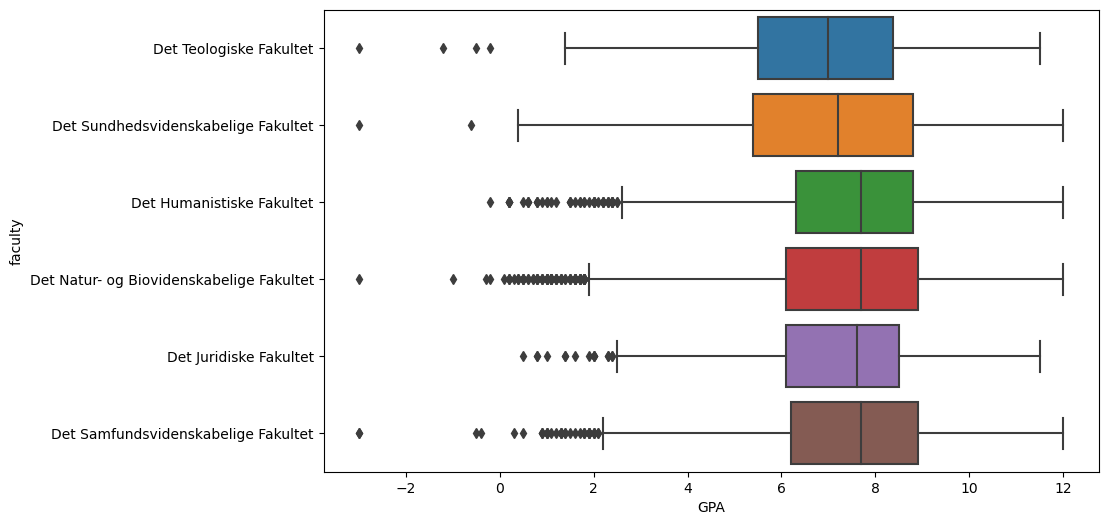

In [35]:
f,ax = plt.subplots(1,1, figsize=(10,6))
sns.boxplot(x='GPA',y='faculty', data=df_statistik, ax=ax)

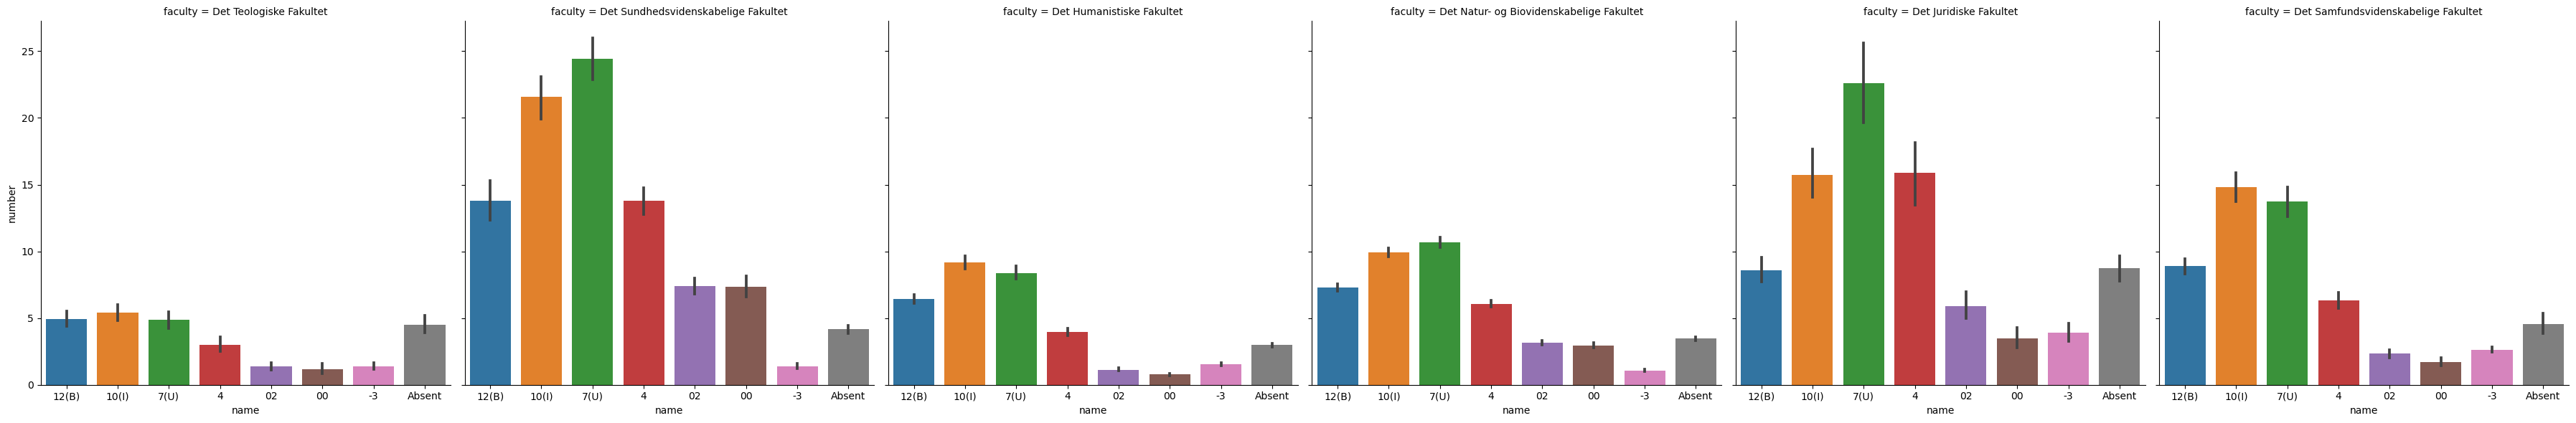

In [36]:
df_plot = pd.melt(df_statistik, 
                  id_vars=['courseID','courseName','faculty','department','term','credit','type','GPA'], 
                  var_name='name', 
                  value_name='number')
p1 = df_plot[df_plot['name'].isin(['Absent','-3','00','02','4','7(U)', '10(I)', '12(B)'])==True]
sns.catplot(x='name', y='number', col='faculty', data=p1, kind='bar', height=6)


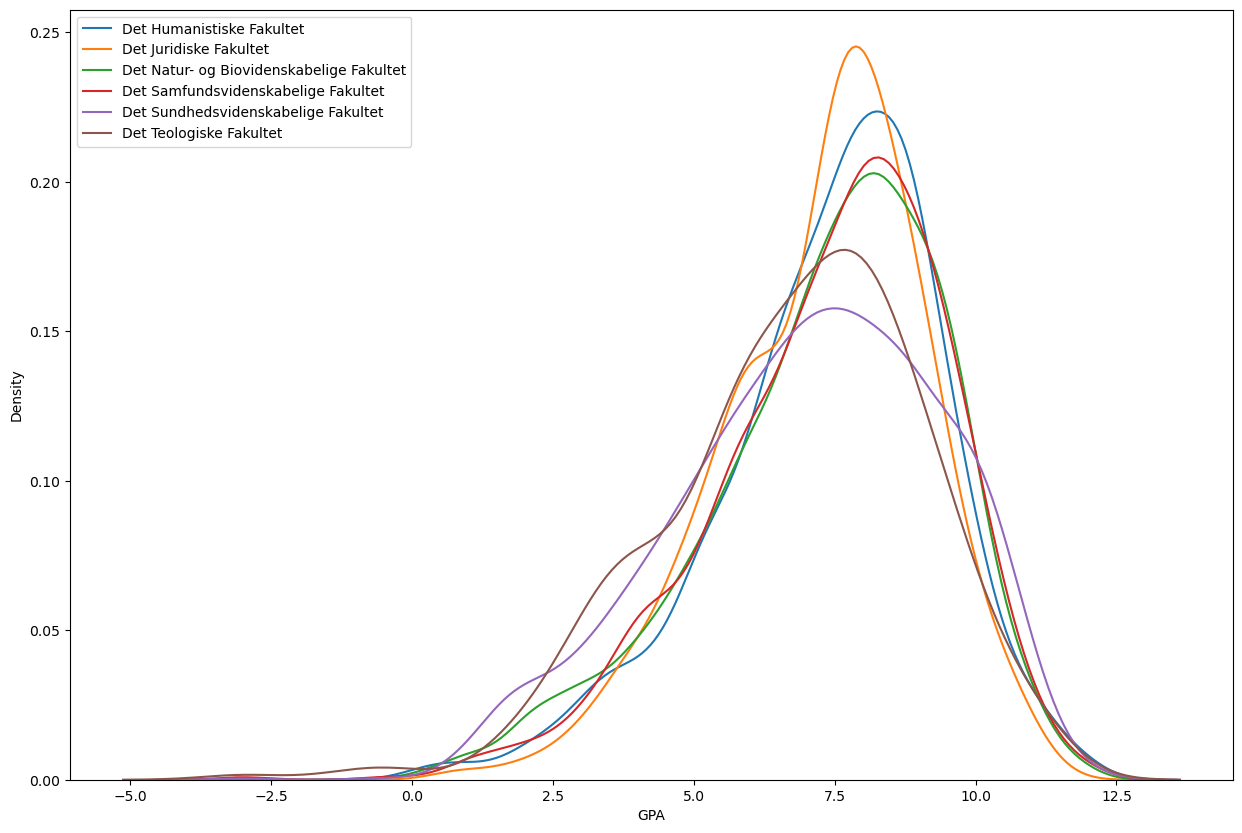

In [37]:
# sns.kdeplot(df_plot['gennemsnit'])
# Create a figure and axis
f, ax = plt.subplots(figsize=(15,10))

# Group the DataFrame by 'faculty' and 'GPA'
gr = df.groupby('faculty').GPA

# For each group, create a KDE plot
for label, arr in gr:
    sns.kdeplot(arr, label=label, fill=False, ax=ax)
    
    # Show the legend
plt.legend()